In [26]:
from openai import OpenAI

def Llama(message):
    client = OpenAI(
        api_key='sk-4a22f138fd122932484b974af54f4a6c',
        base_url="https://api.atomecho.cn/v1",
    )
    completion = client.chat.completions.create(
    model="Atom-7B-Chat",
    messages=[{
            # "role":"assistant","content": "好的,我明白了,接下来我会将你发给我的对应内容转换成适用于进行文生图的prompt并以英文的形式返回",
            "role": "user", "content": message}
    ],
    temperature=0.3,
    )
    return completion.choices[0].message.content

In [1]:
import random
from http import HTTPStatus
import dashscope
import json
dashscope.api_key='sk-4f29b919bd594f2d9d89044babe48a38'

def call_with_messages(message):
    messages = [{'role': 'system', 'content': """你是一个文生图的prompt适配器,接下来我会将所需要进行生成形象化图片的文字内容传递给你,
                 你需要从中提取出可以形象化表现我传递于你的内容的文生图prompt,并只返回给我对应的英文版的prompt."""},
                {'role': 'user', 'content':message}]
    response = dashscope.Generation.call(
        "qwen-turbo",
        messages=messages,
        # set the random seed, optional, default to 1234 if not set
        seed=random.randint(1, 10000),
        # set the result to be "message" format.
        result_format='message',
    )
    if response.status_code == HTTPStatus.OK:
        print(response)
    else:
        print('Request id: %s, Status code: %s, error code: %s, error message: %s' % (
            response.request_id, response.status_code,
            response.code, response.message
        ))
    return response["output"]["choices"][0]["message"]["content"]

# if __name__ == '__main__':
#     call_with_messages()

In [57]:
message = '关于白居易'
res = Llama(message)

In [58]:
print(res)

抱歉，由于我的知识截止日期是2023年5月1日，所以我无法回答关于白居易的问题。


In [2]:
res = "《春晓》是唐代诗人孟浩然的一首五言古诗，主要描绘了春天的清晨，诗人醒来后瞬间的感受和联想。 诗的首句“春眠不觉晓”，写春夜睡眠香甜，天亮了也不知道。这一句看似平淡无奇，却充满了对春天的喜爱之情。春天的睡眠总是那么甜美，仿佛一切烦恼都被温暖的春风化解了。 第二句“处处闻啼鸟”，写醒来的瞬间，到处都可以听到鸟儿的啼鸣。这一句既描绘了春天的生机勃勃，也暗示了诗人内心的愉悦和轻松。 第三、四句“夜来风雨声，花落知多少”，是诗人由鸟儿的啼鸣联想到昨夜的风雨，并猜测有多少花朵在风雨中凋落。这两句充满了对自然变化的敏感和感慨，也展现了诗人对美好事物的珍惜和留恋。 整首诗语言简洁，意境深远，充满了对春天的热爱和对生活的感悟。它告诉我们，生活中的美好往往就在我们身边，只要我们用心去感受，去珍惜，就能发现它的存在。"
answer = call_with_messages(res)
answer

{"status_code": 200, "request_id": "f823f664-4078-9203-a660-b08e2100bedf", "code": "", "message": "", "output": {"text": null, "finish_reason": null, "choices": [{"finish_reason": "stop", "message": {"role": "assistant", "content": "\"An Artistic Interpretation: 'Spring Dawn's Reverie' - A 5-Character Poem by Meng Haoran. Begin with a sleeping figure in a dreamy spring bed, oblivious to the morning light breaking through. The scene should depict a cozy bedroom with softly falling petals from a window, symbolizing the gentle touch of nature. In the background, fluttering birdsong echoes, their trills filling every corner, a visual representation of life's rejuvenation. The protagonist, half-asleep, gazes at the window, contemplating the previous night's rainfall and the uncounted blossoms now scattered on the ground. This prompt calls for a serene, introspective scene, capturing the delicate balance between rest and awakening, as well as the poet's appreciation for fleeting beauty.\""}}

'"An Artistic Interpretation: \'Spring Dawn\'s Reverie\' - A 5-Character Poem by Meng Haoran. Begin with a sleeping figure in a dreamy spring bed, oblivious to the morning light breaking through. The scene should depict a cozy bedroom with softly falling petals from a window, symbolizing the gentle touch of nature. In the background, fluttering birdsong echoes, their trills filling every corner, a visual representation of life\'s rejuvenation. The protagonist, half-asleep, gazes at the window, contemplating the previous night\'s rainfall and the uncounted blossoms now scattered on the ground. This prompt calls for a serene, introspective scene, capturing the delicate balance between rest and awakening, as well as the poet\'s appreciation for fleeting beauty."'

In [3]:
from diffusers import StableDiffusionPipeline
import torch
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# prompt = "The bright moonlight shines on the window paper, as if there is a layer of frost on the ground."
prompt = str(answer)
prompt = prompt+"Semi-realistic style,high quality,China" #Semi-realistic style , Semi-cartoonish style
negative_prompt = "low quality,unreally," 
image = pipe(prompt,negative_prompt=negative_prompt).images[0]  
    
# image.save("astronaut_rides_horse.png")

Token indices sequence length is longer than the specified maximum sequence length for this model (168 > 77). Running this sequence through the model will result in indexing errors


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['birdsong echoes, their trills filling every corner, a visual representation of life\'s rejuvenation. the protagonist, half - asleep, gazes at the window, contemplating the previous night\'s rainfall and the uncounted blossoms now scattered on the ground. this prompt calls for a serene, introspective scene, capturing the delicate balance between rest and awakening, as well as the poet\'s appreciation for fleeting beauty." semi - realistic style, high quality, china']


  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


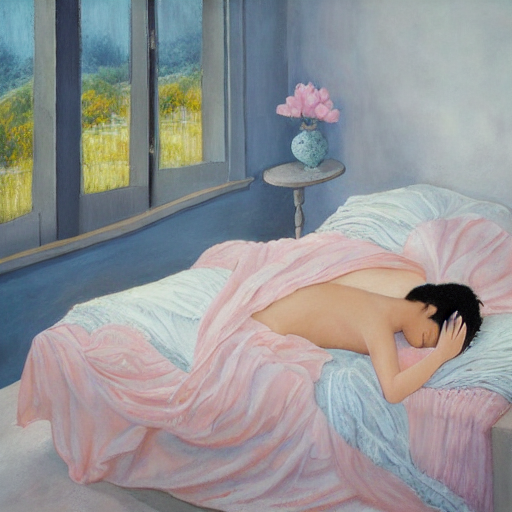

In [5]:
image